In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import os

<h1 style='text-align: center'}>Time Series</h1>

## Time Series Analysis
In this part of the project, the goal is to analyze and understand the patterns and trends in the data over time. Time series data is collected at different points in time, and analyzing it helps me uncover important insights such as seasonality, trends, and cycles.

In [35]:
train_macro_analysed = pd.read_csv("data/processed_data/train_macro_analysed.csv")

In [36]:
train_macro_analysed.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,log_full_sq,cafe_sum_1000_min_price_avg_binned,cafe_sum_1500_min_price_avg_binned,cafe_sum_500_min_price_avg_binned,cafe_sum_2000_min_price_avg_binned,district,day,month,year,season
0,1,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,3.784190,Low,Low,Low,Low,Northern Administrative Okrug,20,8,2011,Summer
1,2,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,3.555348,Low,Medium,High,Medium,Southern Administrative Okrug,23,8,2011,Summer
2,3,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,3.784190,Medium,Low,Medium,Low,Southeast Administrative Okrug,27,8,2011,Summer
3,4,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,4.499810,Medium,Medium,High,Medium,Western Administrative Okrug,1,9,2011,Fall
4,5,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,4.356709,High,High,Medium,High,Central Administrative Okrug,5,9,2011,Fall


In [37]:
train_macro_analysed.timestamp

0        2011-08-20
1        2011-08-23
2        2011-08-27
3        2011-09-01
4        2011-09-05
            ...    
27781    2015-06-30
27782    2015-06-30
27783    2015-06-30
27784    2015-06-30
27785    2015-06-30
Name: timestamp, Length: 27786, dtype: object

In [38]:
train_macro_analysed['timestamp'] = pd.to_datetime(train_macro_analysed['timestamp'])

In [39]:
train_macro_analysed.timestamp

0       2011-08-20
1       2011-08-23
2       2011-08-27
3       2011-09-01
4       2011-09-05
           ...    
27781   2015-06-30
27782   2015-06-30
27783   2015-06-30
27784   2015-06-30
27785   2015-06-30
Name: timestamp, Length: 27786, dtype: datetime64[ns]

I will start by extracting specific time-related features from the timestamp column. By creating new columns for the day, month, and year, I will break down the data into smaller time units. This will help in identifying patterns and trends at different levels of granularity, such as daily, monthly, and yearly.

In [40]:
train_macro_analysed['day'] = train_macro_analysed['timestamp'].dt.day
train_macro_analysed['month'] = train_macro_analysed['timestamp'].dt.month
train_macro_analysed['year'] = train_macro_analysed['timestamp'].dt.year

In [41]:
train_macro_analysed.year.value_counts().sort_index()

year
2011      608
2012     4311
2013     7370
2014    12510
2015     2987
Name: count, dtype: int64

The data shows a sharp increase in entries from 2011 to 2014, peaking in 2014, followed by a significant drop in 2015. The drop in 2011 and 2015 is likely due to missing monthly data for these years, explaining the lower number of entries compared to 2012-2014.

In [42]:
monthly_counts = train_macro_analysed.groupby(['year', 'month']).size().reset_index(name='count')

print(monthly_counts)

    year  month  count
0   2011      8      3
1   2011      9     34
2   2011     10    170
3   2011     11    213
4   2011     12    188
5   2012      1    221
6   2012      2    295
7   2012      3    320
8   2012      4    248
9   2012      5    252
10  2012      6    311
11  2012      7    339
12  2012      8    288
13  2012      9    502
14  2012     10    488
15  2012     11    526
16  2012     12    521
17  2013      1    239
18  2013      2    255
19  2013      3    725
20  2013      4    773
21  2013      5    511
22  2013      6    492
23  2013      7    696
24  2013      8    609
25  2013      9    597
26  2013     10    821
27  2013     11    822
28  2013     12    830
29  2014      1    804
30  2014      2   1049
31  2014      3   1091
32  2014      4   1190
33  2014      5   1025
34  2014      6   1175
35  2014      7    666
36  2014      8    747
37  2014      9   1023
38  2014     10   1023
39  2014     11   1153
40  2014     12   1564
41  2015      1    384
42  2015   

In 2011, data is only available from August to December, while in 2015, there is no data from July onward. This absence of data explains the lower number of entries for these years.

In [9]:
train_macro_analysed.month.value_counts().sort_index()

month
1     1648
2     2050
3     2707
4     2918
5     2288
6     2352
7     1701
8     1647
9     2156
10    2502
11    2714
12    3103
Name: count, dtype: int64

The data shows a relatively consistent distribution of entries across the months, with the highest number of entries in December (3103) and the lowest in January (1648). Months with higher entries, particularly December, may indicate more activity or reporting towards the end of the year. However, the distribution is generally balanced, so seasonal effects on house prices may not be extremely pronounced in the data.

Let's explore the average price (log-trasformed) during every year. 

In [43]:
avg_price_per_year = train_macro_analysed.groupby('year')['log_price_doc'].mean()
avg_price_per_year

year
2011    15.653696
2012    15.602450
2013    15.635813
2014    15.728786
2015    15.783313
Name: log_price_doc, dtype: float64

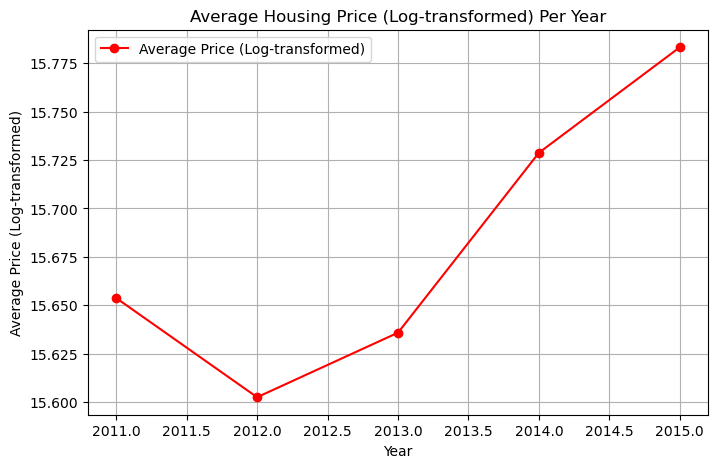

In [53]:
plt.figure(figsize=(8, 5))
plt.plot(avg_price_per_year.index, avg_price_per_year.values, marker='o', color='r', label='Average Price (Log-transformed)')
plt.title('Average Housing Price (Log-transformed) Per Year')
plt.xlabel('Year')
plt.ylabel('Average Price (Log-transformed)')
plt.grid(True)
plt.legend()
plt.show()

In [46]:
total_price_per_year = train_macro_analysed.groupby('year')['log_price_doc'].sum()
total_price_per_year

year
2011      9517.447300
2012     67262.163379
2013    115235.938976
2014    196767.117367
2015     47144.756463
Name: log_price_doc, dtype: float64

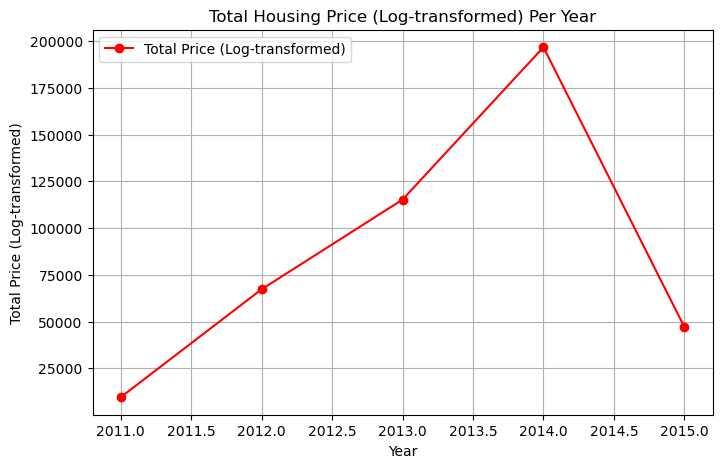

In [52]:
plt.figure(figsize=(8, 5))
plt.plot(total_price_per_year.index, total_price_per_year.values, marker='o', color='r', label='Total Price (Log-transformed)')
plt.title('Total Housing Price (Log-transformed) Per Year')
plt.xlabel('Year')
plt.ylabel('Total Price (Log-transformed)')
plt.grid(True)
plt.legend()
plt.show()

The total sum of log_price_doc for each year shows a clear upward trend from 2011 to 2014, with a sharp decline in 2015. The drop in 2015 and 2011 may be due to missing data or other factors affecting the housing market that year.

Let's see the transaction count per year.

In [47]:
transaction_count_per_year = train_macro_analysed.groupby('year')['log_price_doc'].count()
transaction_count_per_year

year
2011      608
2012     4311
2013     7370
2014    12510
2015     2987
Name: log_price_doc, dtype: int64

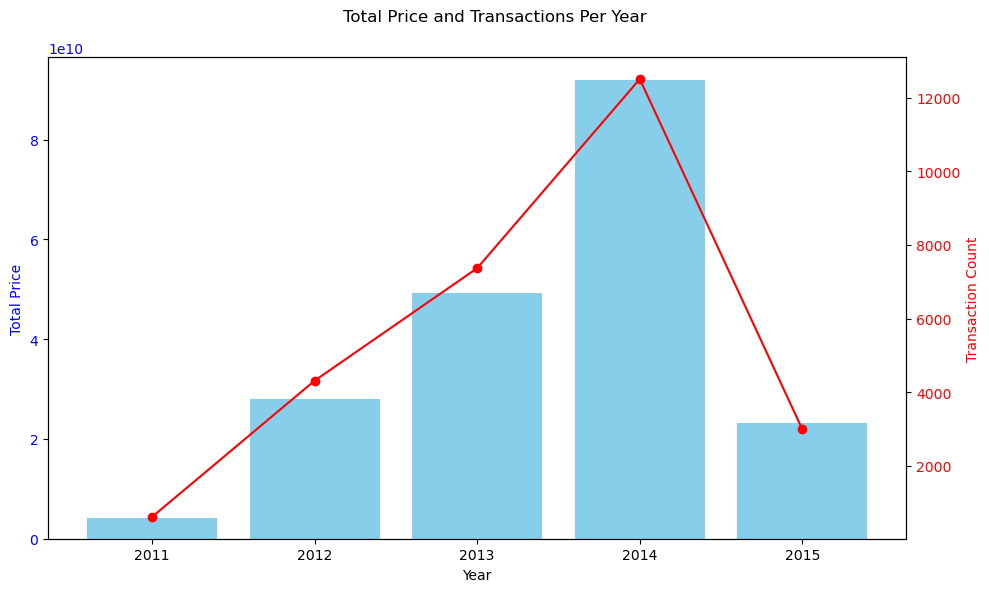

In [14]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(total_price_per_year.index, total_price_per_year.values, color='skyblue', label='Total Price (Log-transformed)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(transaction_count_per_year.index, transaction_count_per_year.values, marker='o', color='red', label='Transactions')
ax2.set_ylabel('Transaction Count', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle('Total Price and Transactions Per Year')
fig.tight_layout()
plt.show()

Аgain we see low values in these 2 years (2011 and 2015), maybe because of the lack of data

year        2011       2012       2013       2014       2015
month                                                       
1            NaN  15.702373  15.525863  15.699842  15.810150
2            NaN  15.713306  15.574844  15.711430  15.802225
3            NaN  15.712969  15.608523  15.710460  15.796599
4            NaN  15.725659  15.578236  15.748560  15.768959
5            NaN  15.694244  15.538360  15.745964  15.758883
6            NaN  15.748439  15.633051  15.719899  15.772464
7            NaN  15.647926  15.644357  15.710596        NaN
8      15.581733  15.601034  15.643160  15.748954        NaN
9      15.630927  15.553720  15.653338  15.753732        NaN
10     15.653567  15.506661  15.667914  15.710954        NaN
11     15.659229  15.500564  15.690156  15.713016        NaN
12     15.652810  15.449955  15.714564  15.753552        NaN


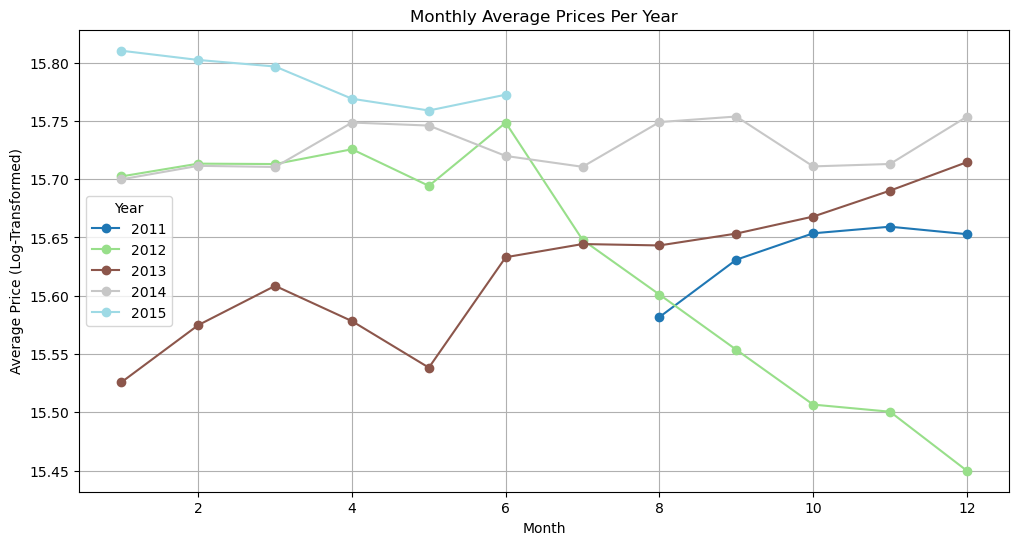

In [59]:
monthly_avg_price = train_macro_analysed.groupby(['year', 'month'])['log_price_doc'].mean().unstack(level=0)
print(monthly_avg_price)

monthly_avg_price.plot(figsize=(12, 6), cmap='tab20', marker='o')
plt.title('Monthly Average Prices Per Year')
plt.xlabel('Month')
plt.ylabel('Average Price (Log-Transformed)')
plt.legend(title='Year')
plt.grid()
plt.show()

The analysis of average monthly document prices for the period 2011-2015 shows interesting trends. Despite the presence of missing data for 2011 and 2015, there is a general trend towards increasing average prices over the years, especially between 2011 and 2014. In 2013 and 2014 prices appear relatively stable, while in 2015 there is a decline, especially towards the end of the year.

In [64]:
# MONTHLY ANALYSIS
transactions_per_month = train_macro_analysed.groupby('month')['log_price_doc'].count()
transactions_per_month

month
1     1648
2     2050
3     2707
4     2918
5     2288
6     2352
7     1701
8     1647
9     2156
10    2502
11    2714
12    3103
Name: log_price_doc, dtype: int64

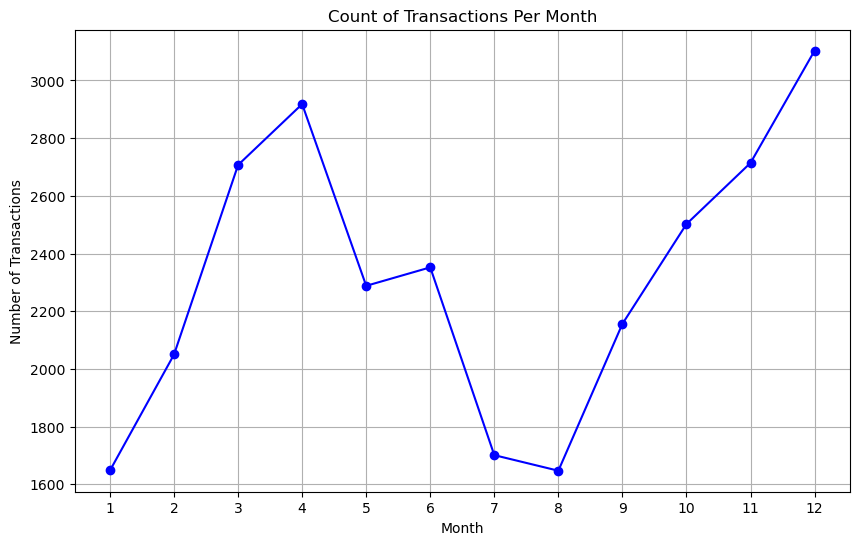

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(transactions_per_month.index, transactions_per_month.values, marker='o', linestyle='-', color='b')
plt.title('Count of Transactions Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(range(1, 13))
plt.grid()
plt.show()

We can see that the most transactions were made in December although it is not involved in every year due to the lack of data 

In [63]:
# SEASONAL ANALYSIS

I will add new column to the dataset named `season`.

In [20]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

train_macro_analysed['season'] = train_macro_analysed['month'].apply(get_season)

In [21]:
train_macro_analysed['season'].value_counts()

season
Spring    7913
Fall      7372
Winter    6801
Summer    5700
Name: count, dtype: int64

The highest number of transactions occurred in the spring, followed by fall, winter, and summer.

In [66]:
avg_price_per_season = train_macro_analysed.groupby('season')['log_price_doc'].mean()

season_order = ['Winter', 'Spring', 'Summer', 'Fall']
avg_price_per_season = avg_price_per_season.reindex(season_order)
avg_price_per_season

season
Winter    15.698218
Spring    15.701982
Summer    15.692348
Fall      15.663006
Name: log_price_doc, dtype: float64

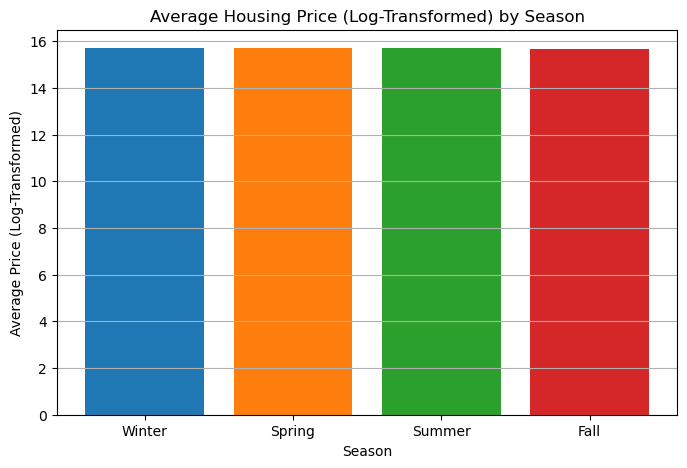

In [67]:
plt.figure(figsize=(8, 5))
plt.bar(avg_price_per_season.index, avg_price_per_season.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Average Housing Price (Log-Transformed) by Season')
plt.xlabel('Season')
plt.ylabel('Average Price (Log-Transformed)')
plt.grid(axis='y')
plt.show()

Relatively consistent average price (Log-Transformed) per seasons, with only a slight decrease in the fall compared to winter, spring, and summer.

season       Fall     Spring     Summer     Winter
year                                              
2011    15.654613        NaN  15.581733  15.652810
2012    15.520128  15.711053  15.666854  15.578665
2013    15.672191  15.579023  15.640856  15.653591
2014    15.725377  15.735182  15.725891  15.727983
2015          NaN  15.775002  15.772464  15.805870


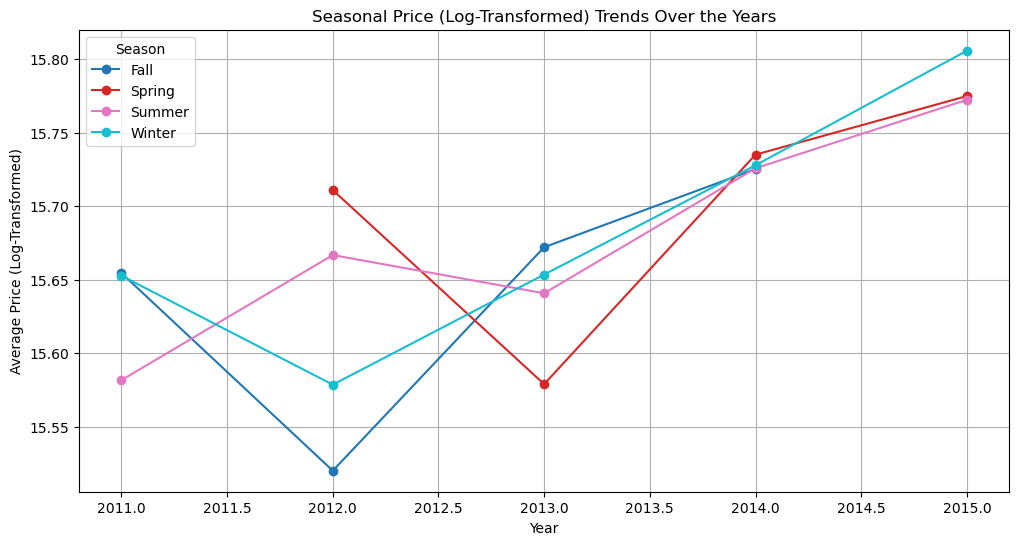

In [71]:
seasonal_trends = train_macro_analysed.groupby(['year', 'season'])['log_price_doc'].mean().unstack()
print(seasonal_trends)

seasonal_trends.plot(figsize=(12, 6), marker='o', cmap='tab10')
plt.title('Seasonal Price (Log-Transformed) Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price (Log-Transformed)')
plt.legend(title='Season')
plt.grid()
plt.show()

In [25]:
train_macro_analysed[(train_macro_analysed['season'] == "Spring") & (train_macro_analysed['year'] == 2011)]

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,log_full_sq,cafe_sum_1000_min_price_avg_binned,cafe_sum_1500_min_price_avg_binned,cafe_sum_500_min_price_avg_binned,cafe_sum_2000_min_price_avg_binned,district,day,month,year,season


The seasonal trends show that the log-transformed average house price per transaction is relatively stable across seasons, with slight fluctuations, and a noticeable increase in 2015, especially in winter, while some seasons have missing data for certain years.

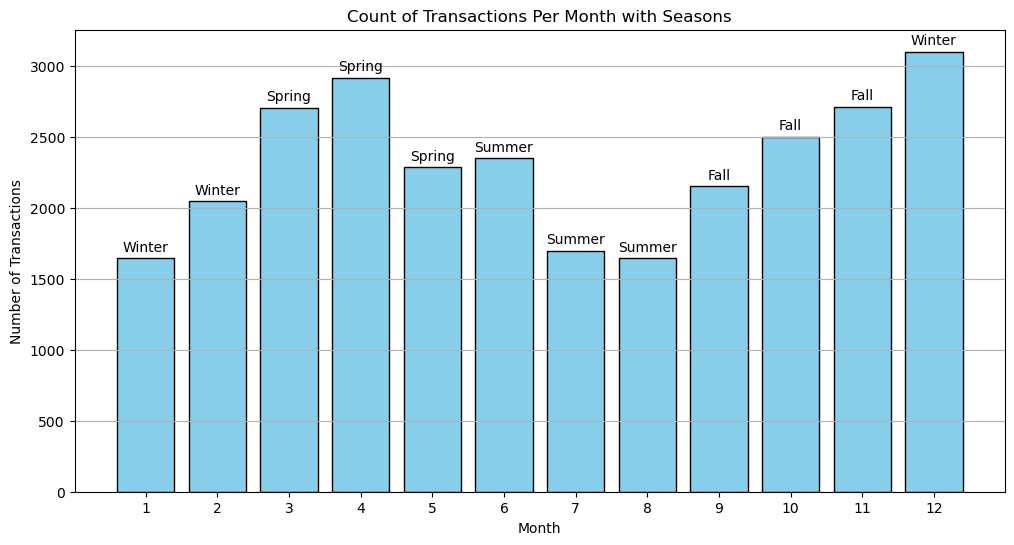

In [26]:
seasons = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 
           'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']

plt.figure(figsize=(12, 6))
plt.bar(transactions_per_month.index, transactions_per_month.values, color='skyblue', edgecolor='black')
for month, season in enumerate(seasons, start=1):
    plt.text(month, transactions_per_month[month] + 50, season, ha='center', fontsize=10)

plt.title('Count of Transactions Per Month with Seasons')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(range(1, 13)) 
plt.grid(axis='y')
plt.show()

In [33]:
# Saving the ANALYSED dataset with new changes into csv file 

processed_data_dir = "data/processed_data"
os.makedirs(processed_data_dir, exist_ok=True)

file_path = os.path.join(processed_data_dir, "train_macro_analysed.csv")
train_macro_analysed.to_csv(file_path, index=False)

print(f"Dataset saved to {file_path}")

Dataset saved to data/processed_data\train_macro_analysed.csv


## Time Series Modeling

In [74]:
train_macro_analysed_dt = train_macro_analysed.set_index("timestamp", drop=True)

In [77]:
columns_to_drop = [
    'price_doc',
    'full_sq',
    'cafe_sum_1000_min_price_avg', 
    'cafe_sum_1500_min_price_avg', 
    'cafe_sum_500_min_price_avg', 
    'cafe_sum_2000_min_price_avg',
    'num_room',
    'sub_area',
    'id'
]

In [78]:
train_macro_analysed_dt = train_macro_analysed_dt.drop(columns=columns_to_drop)

In [82]:
train_macro_analysed_dt.shape

(27786, 135)

In [80]:
train_macro_analysed_dt_dummies = pd.get_dummies(train_macro_analysed_dt, drop_first=True)

In [81]:
train_macro_analysed_dt_dummies.shape

(27786, 152)

In [85]:
scaler = MinMaxScaler()

In [86]:
numerical_columns = train_macro_analysed_dt_dummies.select_dtypes(include=['int64', 'float64']).columns

In [87]:
train_macro_analysed_dt_dummies_scaled = scaler.fit_transform(train_macro_analysed_dt_dummies[numerical_columns])

In [89]:
data_day_resampled = train_macro_analysed_dt_dummies.resample('D').mean() 

In [91]:
data_day_resampled.head()

,life_sq,floor,max_floor,material,build_year,kitch_sq,state,area_m,raion_popul,green_zone_part,...,district_Southeast Administrative Okrug,district_Southeastern Administrative Okrug,district_Southern Administrative Okrug,district_Southwestern Administrative Okrug,district_Troitsky Administrative Okrug,district_Western Administrative Okrug,district_Zelenograd Administrative Okrug,season_Spring,season_Summer,season_Winter
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-08-20,27.0,4.0,12.0,1.0,1979.0,6.0,2.0,6407578.100,155572.0,0.189727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-23,19.0,3.0,12.0,1.0,1979.0,6.0,2.0,9589336.912,115352.0,0.372602,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
data_day_resampled.ffill(inplace=True)

In [93]:
data_day_resampled.head()

,life_sq,floor,max_floor,material,build_year,kitch_sq,state,area_m,raion_popul,green_zone_part,...,district_Southeast Administrative Okrug,district_Southeastern Administrative Okrug,district_Southern Administrative Okrug,district_Southwestern Administrative Okrug,district_Troitsky Administrative Okrug,district_Western Administrative Okrug,district_Zelenograd Administrative Okrug,season_Spring,season_Summer,season_Winter
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-08-20,27.0,4.0,12.0,1.0,1979.0,6.0,2.0,6407578.100,155572.0,0.189727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-08-21,27.0,4.0,12.0,1.0,1979.0,6.0,2.0,6407578.100,155572.0,0.189727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-08-22,27.0,4.0,12.0,1.0,1979.0,6.0,2.0,6407578.100,155572.0,0.189727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-08-23,19.0,3.0,12.0,1.0,1979.0,6.0,2.0,9589336.912,115352.0,0.372602,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-08-24,19.0,3.0,12.0,1.0,1979.0,6.0,2.0,9589336.912,115352.0,0.372602,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [94]:
# MONTHLY

In [95]:
data_monthly_resampled = train_macro_analysed_dt_dummies.resample('M').mean()

In [96]:
data_monthly_resampled.head()

,life_sq,floor,max_floor,material,build_year,kitch_sq,state,area_m,raion_popul,green_zone_part,...,district_Southeast Administrative Okrug,district_Southeastern Administrative Okrug,district_Southern Administrative Okrug,district_Southwestern Administrative Okrug,district_Troitsky Administrative Okrug,district_Western Administrative Okrug,district_Zelenograd Administrative Okrug,season_Spring,season_Summer,season_Winter
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-08-31,25.000000,3.000000,12.0,1.0,1979.0,6.0,2.0,6.935062e+06,124210.666667,0.224963,...,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0
2011-09-30,29.205882,6.911765,12.0,1.0,1979.0,6.0,2.0,1.107338e+07,111613.058824,0.152471,...,0.117647,0.000000,0.235294,0.000000,0.0,0.205882,0.000000,0.0,0.0,0.0
2011-10-31,32.558824,6.867647,12.0,1.0,1979.0,6.0,2.0,9.541725e+06,106670.952941,0.202127,...,0.076471,0.058824,0.300000,0.052941,0.0,0.088235,0.011765,0.0,0.0,0.0
2011-11-30,29.262911,6.340376,12.0,1.0,1979.0,6.0,2.0,9.667524e+06,104617.906103,0.191806,...,0.051643,0.070423,0.319249,0.028169,0.0,0.051643,0.032864,0.0,0.0,0.0
2011-12-31,28.186170,6.340426,12.0,1.0,1979.0,6.0,2.0,9.152938e+06,101696.292553,0.176934,...,0.079787,0.074468,0.218085,0.031915,0.0,0.079787,0.010638,0.0,0.0,1.0


My idea here is to try different resamples - `.resample()`, shifts - `.shift()`, differences - `diff()`, make some combinations and than do stacking.